### Random Forest Classifier

1. The main aim of this project is to predict whether a person earns more than 50k $ or not using a Random Forest Classifier.

### Steps Covered

1.  Importing Libraries

2.  Loading the Dataset

3.  Data Exploration

4.  Data Preprocessing (Handling missing values, encoding categoricaldata) 

5. Divide the dataset into independent and dependent features and feature scaling on the inputs

6. Splitting the Data into training and testing data

7.  Training Random Forest Classifier

8.  Making Predictions

9.  Evaluating the Model

10. Visualizing Feature Importance

11. To predict whether a person earns more than $50K per year

### Step 1: Importing Libraries

In [4290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import accuracy_score, confusion_matrix, classification_report

### Step 2: Loading the Dataset

In [4291]:
df = pd.read_csv('adult.csv')

In [4292]:
### Display the entire dataframe

print(df)

       age workclass  fnlwgt  ... hours.per.week  native.country income
0       90         ?   77053  ...             40   United-States  <=50K
1       82   Private  132870  ...             18   United-States  <=50K
2       66         ?  186061  ...             40   United-States  <=50K
3       54   Private  140359  ...             40   United-States  <=50K
4       41   Private  264663  ...             40   United-States  <=50K
...    ...       ...     ...  ...            ...             ...    ...
32556   22   Private  310152  ...             40   United-States  <=50K
32557   27   Private  257302  ...             38   United-States  <=50K
32558   40   Private  154374  ...             40   United-States   >50K
32559   58   Private  151910  ...             40   United-States  <=50K
32560   22   Private  201490  ...             20   United-States  <=50K

[32561 rows x 15 columns]


### Step 3:  Data Exploration

In [4293]:
### get all the columns used in the dataset

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

### OBSERVATIONS:

Here we have the dataset that describes about the income of a particular person and it contains the following features:-

1. 'age'          --------------->  Age of the person 

2. 'workclass'    --------------->  Workclass of the person

3. 'fnlwgt'       --------------->  how many people in the U.S. population a particular record (row) corresponds to 

4. 'education'    ----------------> education of the person

5. 'education.num' ---------------> Total number of years a formal education has completed

6. 'marital.status' ---------------> Married/ Unmarried

7. 'occupation'    ----------------> Type of the Job/Profession

8. 'relationship' -----------------> Single/Married

9. 'race'        -------------------> Race of a person like White, Black

10. 'sex'        -------------------> Gender of thge person like Male, Female

11. 'capital.gain' -----------------> Profit earned from selling assets

12. 'capital.loss' -----------------> Loss incurred from the selling assets

13. 'hours.per.week' ----------------> Average working hours per week

14. 'native.country' -----------------> Origin of the country

15. 'income'       -------------------> Annual Income Category


All the above features are the inputs except the last one

'income' feature is the output.

In [4294]:
### Total number of records in the dataset

print("Total number of records used in the dataset is:", len(df))

Total number of records used in the dataset is: 32561


In [4295]:
### Shape of the dataset

df.shape

(32561, 15)

In [4296]:
### get the first five rows of the dataset

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4297]:
### get the last five rows of the dataset

df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4298]:
### get the information about all the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4299]:
### get the descriptive summary statistics about the dataset

df.describe()  ### numerical columns

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4300]:
df.describe(include='object')  ### categorical columns

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


### Step 4:  Data Preprocessing (Handling missing values, encoding categoricaldata) 

In [4301]:
### Check for any NULL Values in the dataset

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4302]:
df['age'].value_counts()  ### unique values of all the ages

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

### OBSERVATIONS:

1. The age column has a unique category value in it.

### Categorical Columns

In [4303]:
df['workclass'].value_counts() ### unique values of all the workclass

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

### OBSERVATIONS:

1. There is one category of 'workclass' called '?' that is NULL. So replace it

In [4304]:
df[df['workclass'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [4305]:
### Replace '?' value of the workclass with the mode value of it

mode_value = df['workclass'].mode()[0]

mode_value

'Private'

In [4306]:
### Replace the '?' value of the workclass with the mode value of it

df['workclass'].replace('?',mode_value,inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_19936\1568206510.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].replace('?',mode_value,inplace=True)


In [4307]:
df['workclass'].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

### OBSERVATIONS:

1. The workclass column has a unique category value in it.

In [4308]:
df['occupation'].value_counts()

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\IPython\core\displayhook.py:292: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [4309]:
### Replace '?' value of the occupation with the mode value of it

mode_value_occupation = df['occupation'].mode()[0]

print(mode_value_occupation)

Prof-specialty


In [4310]:
df['occupation'].replace('?',mode_value_occupation,inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_19936\3037602289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].replace('?',mode_value_occupation,inplace=True)


In [4311]:
df['occupation'].value_counts()

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

### OBSERVATIONS:

1. The occupation column has a unique category value in it.

In [4312]:
### Check if "?" exists for occupation or not

df[df['occupation'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the occupation category.

In [4313]:
### Check if "?" exists for education or not

df[df['education'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the education category.

In [4314]:
### Check if "?" exists for marital.status or not

df[df['marital.status'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the marital.status category.

In [4315]:
### Check if "?" exists for workclass or not

df[df['workclass'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the workclass category.

In [4316]:
### Check if "?" exists for relationship or not

df[df['relationship'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the relationship category.

In [4317]:
### Check if "?" exists for race or not

df[df['race'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the race category.

In [4318]:
### Check if "?" exists for sex or not

df[df['sex'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the sex category.

In [4319]:
### Check if "?" exists for native.country or not

df[df['native.country'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,?,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,?,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


### OBSERVATIONS:

1.   Now there are '?' values in the native.country category. So replace it with the mode

In [4320]:
### Replace '?' values in the native.country category with the mode

mode_native_country = df['native.country'].mode()[0]

print(mode_native_country)

United-States


In [4321]:
df['native.country'].replace('?',mode_native_country,inplace=True)

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_19936\4133110034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native.country'].replace('?',mode_native_country,inplace=True)


In [4322]:
### Again check if "?" exists for native.country or not

df[df['native.country'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the native.country category.

In [4323]:
### Check if "?" exists for native.country or not

df[df['income'] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


### OBSERVATIONS:

1.   Now there is no '?' value in the income category.

In [4324]:
df.describe(include='object')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


### OBSERVATIONS:

1. All the categorical columns are working fine.

### Numerical Columns

In [4325]:
df['age'].isnull().sum()

np.int64(0)

### OBSERVATIONS:

1. There are no NULL Values in the Age column

In [4326]:
df['fnlwgt'].isnull().sum()

np.int64(0)

### OBSERVATIONS:

1. There are no NULL Values in the fnlwgt column

In [4327]:
df['fnlwgt'] = df['fnlwgt'].astype('int')

In [4328]:
df['education.num'].isnull().sum()

np.int64(0)

### OBSERVATIONS:

1. There are no NULL Values in the education.num column

In [4329]:
df['capital.gain'].isnull().sum()

np.int64(0)

### OBSERVATIONS:

1. There are no NULL Values in the capital.gain column

In [4330]:
df['capital.loss'].isnull().sum()

np.int64(0)

### OBSERVATIONS:

1. There are no NULL Values in the capital.loss column

In [4331]:
df['hours.per.week'].isnull().sum()

np.int64(0)

### OBSERVATIONS:

1. There are no NULL Values in the hours.per.week column

In [4332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4333]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Handling all the categorical columns

In [4334]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4335]:
### use label encoder to transform the categories to proper labels

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

### use label encoder to transform the categories to labels

df['workclass'] = label.fit_transform(df['workclass'])

In [4336]:
df['workclass'].value_counts()

workclass
3    24532
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: count, dtype: int64

### OBSERVATIONS:

1. Now all the categories of workclass has been converted into proper labels.

In [4337]:
df['workclass'].value_counts()

workclass
3    24532
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: count, dtype: int64

In [4338]:
x = df.describe(include='object')

## print(x)

### extract the columns from the dataset

ans = x.columns

print(ans)

### loop through all the categorical columns to transfer all the categories into the labels

for x in ans:
    df[x] = label.fit_transform(df[x])

Index(['education', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country', 'income'],
      dtype='object')


In [4339]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


### OBSERVATIONS:

1. Using Lable encoder, we have transformed all the categorical columns into the numerical columns.

### Step 5: Divide the dataset into independent and dependent features and feature scaling on the inputs

In [4340]:
X = df.drop(columns='income', axis=1)

Y = df['income']

In [4341]:
### independent features

print(X)

       age  workclass  fnlwgt  ...  capital.loss  hours.per.week  native.country
0       90          3   77053  ...          4356              40              38
1       82          3  132870  ...          4356              18              38
2       66          3  186061  ...          4356              40              38
3       54          3  140359  ...          3900              40              38
4       41          3  264663  ...          3900              40              38
...    ...        ...     ...  ...           ...             ...             ...
32556   22          3  310152  ...             0              40              38
32557   27          3  257302  ...             0              38              38
32558   40          3  154374  ...             0              40              38
32559   58          3  151910  ...             0              40              38
32560   22          3  201490  ...             0              20              38

[32561 rows x 14 columns]


In [4342]:
### Dependent features

print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64


In [4343]:
### Perform the feature scaling of the inputs

from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()


### use the object for standard scaler to transform theinputs

X_scaled = sc.fit_transform(X)

print(X_scaled)

[[ 3.76961234 -0.08529633 -1.06799736 ... 10.59350656 -0.03542945
   0.26136999]
 [ 3.18311167 -0.08529633 -0.53916866 ... 10.59350656 -1.81720429
   0.26136999]
 [ 2.01011032 -0.08529633 -0.03521956 ... 10.59350656 -0.03542945
   0.26136999]
 ...
 [ 0.10398314 -0.08529633 -0.33543266 ... -0.21665953 -0.03542945
   0.26136999]
 [ 1.42360965 -0.08529633 -0.35877741 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633  0.11095988 ... -0.21665953 -1.65522476
   0.26136999]]


In [4344]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64


### OBSERVATIONS:

1. After performing the feature scaling on all the inputs, all of them are in the same scale range.

### Step 6: Splitting the Data into training and testing data

In [4345]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [4346]:
X_train

array([[-0.92239303, -0.08529633,  0.62989738, ..., -0.21665953,
        -1.25027593,  0.26136999],
       [-1.0690182 , -0.08529633, -0.18476239, ..., -0.21665953,
        -0.44037828,  0.26136999],
       [-0.18926719, -0.08529633, -1.07962236, ..., -0.21665953,
        -0.03542945,  0.26136999],
       ...,
       [ 1.2036719 , -2.79489029,  0.45868676, ...,  4.46625678,
        -0.03542945,  0.26136999],
       [ 0.17729573, -0.08529633, -0.33825601, ..., -0.21665953,
         0.77446821,  0.26136999],
       [-1.21564337, -0.08529633, -0.25686204, ..., -0.21665953,
         0.77446821, -0.89451735]], shape=(26048, 14))

In [4347]:
X_test

array([[-0.70245528, -0.08529633,  0.8606447 , ..., -0.21665953,
        -0.03542945,  0.26136999],
       [-1.43558112, -0.08529633,  2.36858859, ..., -0.21665953,
        -2.06017359,  0.26136999],
       [-0.77576787, -0.08529633,  0.14169461, ..., -0.21665953,
        -0.03542945,  0.26136999],
       ...,
       [ 1.27698448, -0.08529633, -0.75581818, ..., -0.21665953,
        -0.03542945,  0.26136999],
       [-1.21564337, -0.08529633, -0.06639011, ..., -0.21665953,
        -1.65522476,  0.26136999],
       [ 0.47054606,  1.72109965, -0.32486879, ..., -0.21665953,
         1.9893147 ,  0.26136999]], shape=(6513, 14))

In [4348]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (26048, 14)
Shape of the input testing  data is: (6513, 14)


In [4349]:
Y_train

5514     0
19777    0
10781    0
32240    0
9876     0
        ..
29802    0
5390     1
860      1
15795    1
23654    0
Name: income, Length: 26048, dtype: int64

In [4350]:
Y_test

14160    0
27048    0
28868    0
5667     0
7827     0
        ..
1338     0
24534    0
18080    1
10354    0
24639    1
Name: income, Length: 6513, dtype: int64

In [4351]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (26048,)
Shape of the output testing  data is: (6513,)


### Step 7: Training Random Forest Classifier

In [4352]:
from sklearn.ensemble import RandomForestClassifier

### Create an object for Random Forest Classifier

ranclf = RandomForestClassifier(n_estimators = 100, random_state=42)

### using the object for Random Forest Classifier, train the model

ranclf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### OBSERVATIONS:

1. The Random Forest Classfier model has been trained with the help of the training data using the following parameters:-

              (a.) n_estimators = 100 ---------->  100 decision trees are needed 

              (b.) criterion = 'gini' ----------> Gini Impurity is needed

### Step 8: Making Predictions

In [4353]:
Y_pred = ranclf.predict(X_test)

In [4354]:
print(Y_pred)

[0 0 0 ... 1 0 0]


### Step 9: Evaluating the Model

In [4355]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(Y_test,Y_pred)

print("Accuracy of the model is:", (ac * 100.0))

Accuracy of the model is: 85.58268079226164


In [4356]:
cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[4632  344]
 [ 595  942]]


In [4357]:
cr = classification_report(Y_test, Y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4976
           1       0.73      0.61      0.67      1537

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



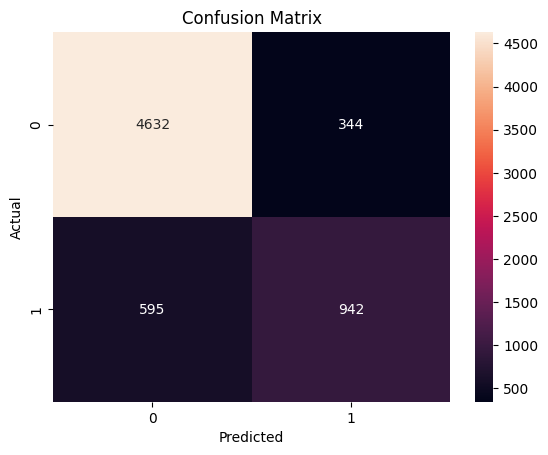

In [4358]:
### Graphically display the confusion matrix

sns.heatmap(cm, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Step 10: Visualizing Feature Importance

[0.15324303 0.03847949 0.16928305 0.03538037 0.0896614  0.06293265
 0.06656515 0.10978078 0.01404554 0.0126609  0.11368667 0.03734528
 0.08221039 0.01472531]
[ 2  0 10  7  4 12  6  5  1 11  3 13  8  9]
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')


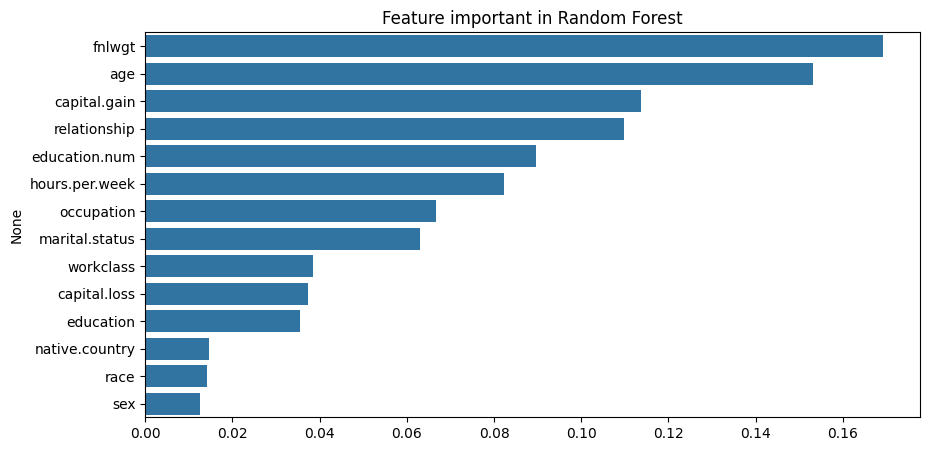

In [4359]:
### extract all the important features

important_features = ranclf.feature_importances_

print(important_features)

## get the indices of all the important features in the descending order

indices = np.argsort(important_features)[::-1]

print(indices)

### get all the imporatant features from the dataset

res = X.columns

print(res)

plt.figure(figsize=(10,5))
sns.barplot(x=important_features[indices], y= res[indices])
plt.title('Feature important in Random Forest')
plt.show()

## OBSERVATIONS:

1.  The above graph shows the list of all the important features used in the dataset

2. The most important feature used in fnlwgt.

### Step 11: To predict whether a person earns more than $50K per year

In [4360]:
new_person = pd.DataFrame({
    'age': [40],
    'workclass': [3],
    'fnlwgt': [200000],
    'education': [9],
    'education.num': [13],
    'marital.status': [2],
    'occupation': [4],
    'relationship': [1],
    'race': [2],
    'sex': [1],
    'capital.gain': [0],
    'capital.loss': [0],
    'hours.per.week': [45],
    'native.country': [24]
})


print(new_person)

   age  workclass  fnlwgt  ...  capital.loss  hours.per.week  native.country
0   40          3  200000  ...             0              45              24

[1 rows x 14 columns]


In [4361]:
### scale the sample data

new_person_scaled = sc.transform(new_person)

print(new_person_scaled)

[[ 0.10398314 -0.08529633  0.09684313 -0.33543693  1.13473876 -0.4062122
  -0.53837032 -0.27780504 -1.96262077  0.70307135 -0.14592048 -0.21665953
   0.36951938 -2.05040469]]


In [4362]:
### predict the income based on the new sample data

prediction = ranclf.predict(new_person_scaled)

In [4363]:
prediction

array([0])

In [4364]:
if prediction == 1:
    print("Predicted Income: >50K")
else:
    print("Predicted Income: <=50K")

Predicted Income: <=50K
